In [5]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 8.9MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 3.2MB 14.0MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 1.1MB 53.2MB/s 
     |████████████████████████████████| 296kB 42.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=ade8e8267d65e7cb73f2086201f4760038cc91228534b90686372c29090b3a8b
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=b24dd682a582a8f1fd70eecdd4aa0357fac23e4ac8ca3b4569da03ee1ca835c7
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

# Chapter4 - Exercise 1: Click Prediction

Cho dữ liệu Click_prediction_small (link:
https://www.openml.org/d/1220 (https://www.openml.org/d/1220) hoặc
sklearn.datasets import fetch_openml với data_id = 1220).
Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Naive Bayes để thực
hiện việc xác định người dùng có click vào một quảng cáo hay không
dựa trên các thông tin được cung cấp.
Yêu cầu:
1. Hãy chuẩn hóa dữ liệu cho phù hợp
2. Áp dụng Naive Bayes. Nhận xét kết quả.
3. Model trên có phù hợp không? Nếu không thì đưa ra phương án khác.

In [6]:
import pandas as pd
from sklearn.datasets import fetch_openml

In [7]:
data = fetch_openml(data_id=1220)
X = pd.DataFrame(
  data['data'],
  columns=data['feature_names']
).astype(float)
y = pd.Series(data['target'], name='click').astype(int)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   impression      39948 non-null  float64
 1   ad_id           39948 non-null  float64
 2   advertiser_id   39948 non-null  float64
 3   depth           39948 non-null  float64
 4   position        39948 non-null  float64
 5   keyword_id      39948 non-null  float64
 6   title_id        39948 non-null  float64
 7   description_id  39948 non-null  float64
 8   user_id         39948 non-null  float64
dtypes: float64(9)
memory usage: 2.7 MB


In [9]:
X.head()

,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id
0,1.0,8343295.0,11700.0,3.0,3.0,21264.0,27892.0,1559.0,0.0
1,1.0,20017077.0,23798.0,1.0,1.0,35498.0,4.0,36476.0,562934.0
2,1.0,21348354.0,36654.0,1.0,1.0,19975.0,36105.0,33292.0,11621116.0
3,1.0,20366086.0,33280.0,3.0,3.0,5942.0,4057.0,4390.0,8778348.0
4,1.0,6803526.0,10790.0,2.0,1.0,60593.0,25242.0,1679.0,12118311.0


In [10]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: click, dtype: int64

In [11]:
concated_data = pd.concat([X, y], axis=1)
concated_data

,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id,click
0,1.0,8343295.0,11700.0,3.0,3.0,21264.0,27892.0,1559.0,0.0,0
1,1.0,20017077.0,23798.0,1.0,1.0,35498.0,4.0,36476.0,562934.0,1
2,1.0,21348354.0,36654.0,1.0,1.0,19975.0,36105.0,33292.0,11621116.0,0
3,1.0,20366086.0,33280.0,3.0,3.0,5942.0,4057.0,4390.0,8778348.0,0
4,1.0,6803526.0,10790.0,2.0,1.0,60593.0,25242.0,1679.0,12118311.0,0
...,...,...,...,...,...,...,...,...,...,...
39943,1.0,21898643.0,37867.0,2.0,1.0,1091.0,1657.0,1914.0,0.0,0
39944,1.0,20575578.0,8873.0,2.0,1.0,8338.0,7866.0,9210.0,19487.0,0
39945,5.0,21183848.0,18716.0,2.0,1.0,9594.0,8881.0,13277.0,2305.0,0
39946,1.0,21222438.0,35880.0,3.0,3.0,13078.0,943122.0,1436.0,0.0,0


In [12]:
import pandas_profiling as pp
profile = pp.ProfileReport(concated_data)
profile

Output hidden; open in https://colab.research.google.com to view.

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

def naive_bayes(X, y, test_size):
  gaus = GaussianNB()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
  gaus.fit(X_train, y_train)
  y_pred = gaus.predict(X_test)

  # mse, mae, variance score, test score, train score, confusion matrix
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  variance_score = gaus.score(X, y)
  test_score = gaus.score(X_test, y_test)
  train_score = gaus.score(X_train, y_train)
  conf_matrix = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  clf_report = classification_report(y_test, y_pred)

  print('Mean Square Error: ', mse)
  print('Mean Absolute Error: ', mae)
  print('Variance Score: ', variance_score)
  print('Train Score: ', train_score)
  print('Test score: ', test_score)
  print('Accuracy sccore: ', accuracy * 100)
  print('Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC): ', roc_auc_score(y_test, y_pred))
  print('=============')
  print('Confusion Matrix:')
  print(conf_matrix)
  print('=============')
  print('Classification Report:\n')
  print(clf_report)

  # calculate roc curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  # plot no skill
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.plot(fpr, tpr, marker='.')
  plt.show()

  return gaus

Mean Square Error:  0.1851063829787234
Mean Absolute Error:  0.1851063829787234
Variance Score:  0.8109041754280565
Train Score:  0.8099067526128043
Test score:  0.8148936170212766
Accuracy sccore:  81.48936170212767
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC):  0.5060346619956992
Confusion Matrix:
[[6451  224]
 [1255   60]]
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6675
           1       0.21      0.05      0.08      1315

    accuracy                           0.81      7990
   macro avg       0.52      0.51      0.49      7990
weighted avg       0.73      0.81      0.76      7990



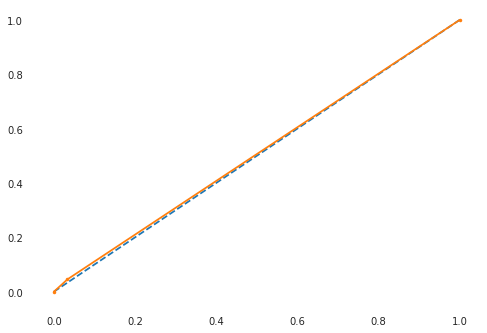

In [57]:
gaus = naive_bayes(X, y, 0.2)

### Nhận xét:
- Vì accuracy score thay đổi từ 70 -> 100 nên data chưa clean khi thay đổi tập train và test
- Cần phải clean lại data